In [1]:
import pandas as pd
import numpy as np
import os
import glob
import random
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def preprocess_data(data, is_train=True):
    
    temp = data.copy()
    
    temp['TARGET_0'] = 0
    temp.loc[temp.TARGET > 0, ['TARGET_0']] = 1
    
    temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET_0']]

    if is_train==True:          
    
        temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')
        temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill')
        temp = temp.dropna()
        
        return temp.iloc[:-96]

    elif is_train==False:
        
        temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET_0']]
                              
        return temp.iloc[-48:, :]

In [3]:
train = pd.read_csv('./data/train/train.csv')

test = []

for i in range(81):
    file_path = './data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_data(temp, is_train=False)
    test.append(temp)

df_test = pd.concat(test)

submission = pd.read_csv('./data/sample_submission.csv')

In [5]:
df_train = preprocess_data(train)

df_train.shape, df_test.shape

((52464, 10), (3888, 8))

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_train[['Hour','DHI','DNI','WS','RH','T']] = scaler.fit_transform(df_train[['Hour','DHI','DNI','WS','RH','T']])
df_test[['Hour','DHI','DNI','WS','RH','T']] = scaler.fit_transform(df_test[['Hour','DHI','DNI','WS','RH','T']])

In [7]:
Day  = df_train.iloc[:, :-2]
Day7 = df_train.iloc[:, -2]
Day8 = df_train.iloc[:, -1]

In [9]:
Day[:48]

,Hour,TARGET,DHI,DNI,WS,RH,T,TARGET_0
0,-1.661325,0.000000,-0.619588,-0.671388,-0.669437,0.556754,-2.092343,0
1,-1.661325,0.000000,-0.619588,-0.671388,-0.669437,0.555848,-2.092343,0
2,-1.516862,0.000000,-0.619588,-0.671388,-0.599382,0.679120,-2.092343,0
3,-1.516862,0.000000,-0.619588,-0.671388,-0.599382,0.677760,-2.092343,0
4,-1.372399,0.000000,-0.619588,-0.671388,-0.599382,0.834117,-2.092343,0
5,-1.372399,0.000000,-0.619588,-0.671388,-0.669437,0.566272,-1.994101,0
6,-1.227936,0.000000,-0.619588,-0.671388,-0.669437,0.714470,-1.994101,0
7,-1.227936,0.000000,-0.619588,-0.671388,-0.739491,0.714017,-1.994101,0
8,-1.083473,0.000000,-0.619588,-0.671388,-0.809545,0.807831,-1.994101,0
9,-1.083473,0.000000,-0.619588,-0.671388,-0.809545,0.807377,-1.994101,0


In [10]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.backend import mean, maximum

tf.random.set_seed(42)

In [11]:
def quantile_loss(q, y, pred):
    err = (y-pred)
    return mean(maximum(q*err, (q-1)*err), axis=-1)

In [12]:
q_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [13]:
from sklearn.model_selection import train_test_split

X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(Day, Day7, test_size=0.25, random_state=42, shuffle=True)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(Day, Day8, test_size=0.25, random_state=42, shuffle=True)

X_train_1.shape, X_valid_1.shape, Y_train_1.shape, Y_valid_1.shape

((39348, 8), (13116, 8), (39348,), (13116,))

In [14]:
model7 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(Day.shape)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model8 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(Day.shape)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [15]:
model7.compile(loss='mse', optimizer='adam')
hist7 = model7.fit(X_train_1, Y_train_1, epochs=25, batch_size=48, validation_split=0.25)
model7.evaluate(X_valid_1, Y_valid_1)

Epoch 1/25
615/615 [==============================] - 1s 2ms/step - loss: 269.6839 - val_loss: 148.4303
Epoch 2/25
615/615 [==============================] - 1s 950us/step - loss: 145.1299 - val_loss: 138.3991
Epoch 3/25
615/615 [==============================] - 1s 1ms/step - loss: 138.1215 - val_loss: 134.9041
Epoch 4/25
615/615 [==============================] - 1s 1ms/step - loss: 137.0068 - val_loss: 132.1010
Epoch 5/25
615/615 [==============================] - 1s 1ms/step - loss: 130.9286 - val_loss: 130.1156
Epoch 6/25
615/615 [==============================] - 1s 1ms/step - loss: 131.4046 - val_loss: 129.6014
Epoch 7/25
615/615 [==============================] - 1s 1ms/step - loss: 131.9779 - val_loss: 128.2699
Epoch 8/25
615/615 [==============================] - 1s 1ms/step - loss: 126.4749 - val_loss: 127.3567
Epoch 9/25
615/615 [==============================] - 1s 1ms/step - loss: 131.2392 - val_loss: 132.2218
Epoch 10/25
615/615 [==============================] - 1s 1ms/

127.44905090332031

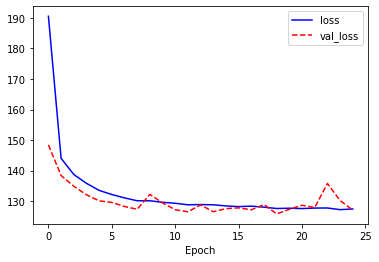

In [16]:
plt.plot(hist7.history['loss'], 'b-', label='loss')
plt.plot(hist7.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
model8.compile(loss='mse', optimizer='adam')
hist8 = model8.fit(X_train_2, Y_train_2, epochs=25, batch_size=48, validation_split=0.25)
model8.evaluate(X_valid_2, Y_valid_2)

Epoch 1/25
615/615 [==============================] - 1s 1ms/step - loss: 357.2846 - val_loss: 163.9644
Epoch 2/25
615/615 [==============================] - 1s 1ms/step - loss: 159.2920 - val_loss: 153.6815
Epoch 3/25
615/615 [==============================] - 1s 1ms/step - loss: 147.0089 - val_loss: 145.1745
Epoch 4/25
615/615 [==============================] - 1s 988us/step - loss: 146.1913 - val_loss: 142.5911
Epoch 5/25
615/615 [==============================] - 1s 1ms/step - loss: 141.7762 - val_loss: 140.1252
Epoch 6/25
615/615 [==============================] - 1s 1ms/step - loss: 143.3518 - val_loss: 139.4403
Epoch 7/25
615/615 [==============================] - 1s 1ms/step - loss: 141.3068 - val_loss: 138.3840
Epoch 8/25
615/615 [==============================] - 1s 1ms/step - loss: 134.7648 - val_loss: 138.6545
Epoch 9/25
615/615 [==============================] - 1s 1ms/step - loss: 138.4281 - val_loss: 135.3657
Epoch 10/25
615/615 [==============================] - 1s 1ms/

130.95970153808594

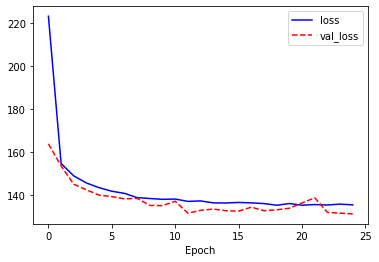

In [18]:
plt.plot(hist8.history['loss'], 'b-', label='loss')
plt.plot(hist8.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
results7 = pd.DataFrame()

for q in q_lst:
    model7.compile(loss=lambda y,pred: quantile_loss(q,y,pred), optimizer='adam')
    model7.fit(Day, Day7, epochs=25, batch_size=48, validation_split=0.25)
    pred = pd.DataFrame(model7.predict(df_test))
    results7 = pd.concat([results7, pred], axis=1)

results7.shape

Epoch 1/25
820/820 [==============================] - 2s 2ms/step - loss: 1.4884 - val_loss: 1.5686
Epoch 2/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3713 - val_loss: 1.5789
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3629 - val_loss: 1.5534
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3549 - val_loss: 1.5496
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3660 - val_loss: 1.5544
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3428 - val_loss: 1.6064
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3532 - val_loss: 1.5794
Epoch 8/25
820/820 [==============================] - 1s 2ms/step - loss: 1.3675 - val_loss: 1.5463
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3544 - val_loss: 1.5645
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3642 - val_loss: 1.5586

820/820 [==============================] - 1s 1ms/step - loss: 2.5359 - val_loss: 2.9679
Epoch 2/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5070 - val_loss: 2.9557
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5111 - val_loss: 2.9784
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4941 - val_loss: 2.9422
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5255 - val_loss: 2.9987
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5186 - val_loss: 2.9746
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5258 - val_loss: 2.9666
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5705 - val_loss: 2.9632
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5140 - val_loss: 2.9897
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5626 - val_loss: 2.9469
Epoch 11/2

820/820 [==============================] - 1s 1ms/step - loss: 2.4558 - val_loss: 2.9560
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4536 - val_loss: 2.9835
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4636 - val_loss: 2.9611
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4766 - val_loss: 3.0087
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5025 - val_loss: 2.9630
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5323 - val_loss: 2.9706
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4616 - val_loss: 2.9597
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 2.5313 - val_loss: 2.9386
Epoch 11/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4207 - val_loss: 2.9693
Epoch 12/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4356 - val_loss: 2.9715
Epoch 13

Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 1.8014 - val_loss: 2.1602
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 1.8441 - val_loss: 2.1360
Epoch 11/25
820/820 [==============================] - 1s 1ms/step - loss: 1.7692 - val_loss: 2.1840
Epoch 12/25
820/820 [==============================] - 1s 1ms/step - loss: 1.7878 - val_loss: 2.1612
Epoch 13/25
820/820 [==============================] - 1s 1ms/step - loss: 1.8152 - val_loss: 2.1644
Epoch 14/25
820/820 [==============================] - 1s 1ms/step - loss: 1.7967 - val_loss: 2.1449
Epoch 15/25
820/820 [==============================] - 1s 1ms/step - loss: 1.7945 - val_loss: 2.2087
Epoch 16/25
820/820 [==============================] - 1s 1ms/step - loss: 1.7932 - val_loss: 2.1613
Epoch 17/25
820/820 [==============================] - 1s 1ms/step - loss: 1.8136 - val_loss: 2.1471
Epoch 18/25
820/820 [==============================] - 1s 1ms/step - loss: 1.8049 - val_loss

820/820 [==============================] - 1s 1ms/step - loss: 0.7228 - val_loss: 0.8763
Epoch 15/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7252 - val_loss: 0.9143
Epoch 16/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7306 - val_loss: 0.8758
Epoch 17/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7291 - val_loss: 0.8599
Epoch 18/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7240 - val_loss: 0.8710
Epoch 19/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7235 - val_loss: 0.8818
Epoch 20/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7259 - val_loss: 0.8663
Epoch 21/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7416 - val_loss: 0.8684
Epoch 22/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7210 - val_loss: 0.8575
Epoch 23/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7233 - val_loss: 0.9187
Ep

(3888, 9)

In [20]:
results8 = pd.DataFrame()

for q in q_lst:
    model8.compile(loss=lambda y,pred: quantile_loss(q,y,pred), optimizer='adam')
    model8.fit(Day, Day8, epochs=25, batch_size=48, validation_split=0.25)
    pred = pd.DataFrame(model8.predict(df_test))
    results8 = pd.concat([results8, pred], axis=1)

results8.shape

Epoch 1/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4831 - val_loss: 1.5788
Epoch 2/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4042 - val_loss: 1.5540
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3902 - val_loss: 1.5730
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3738 - val_loss: 1.5697
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3931 - val_loss: 1.5680
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3872 - val_loss: 1.5582
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3926 - val_loss: 1.5621
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3940 - val_loss: 1.5763
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4017 - val_loss: 1.5568
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3963 - val_loss: 1.5620

820/820 [==============================] - 1s 1ms/step - loss: 2.6888 - val_loss: 3.0790
Epoch 2/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6591 - val_loss: 3.1435
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6751 - val_loss: 3.0633
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6590 - val_loss: 3.0932
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6839 - val_loss: 3.1066
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6673 - val_loss: 3.0280
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6846 - val_loss: 3.0862
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6824 - val_loss: 3.0804
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6811 - val_loss: 3.0911
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6834 - val_loss: 3.0841
Epoch 11/2

820/820 [==============================] - 1s 1ms/step - loss: 2.6541 - val_loss: 3.0994
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6526 - val_loss: 3.1016
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6574 - val_loss: 3.1352
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6639 - val_loss: 3.0945
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6305 - val_loss: 3.0593
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6754 - val_loss: 3.0833
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6784 - val_loss: 3.1614
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6409 - val_loss: 3.0937
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6676 - val_loss: 3.1072
Epoch 11/25
820/820 [==============================] - 1s 1ms/step - loss: 2.6305 - val_loss: 3.0697
Epoch 12/

820/820 [==============================] - 1s 1ms/step - loss: 1.9272 - val_loss: 2.2577
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 1.9143 - val_loss: 2.3017
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 1.8935 - val_loss: 2.2515
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 1.9227 - val_loss: 2.2689
Epoch 11/25
820/820 [==============================] - 1s 1ms/step - loss: 1.8829 - val_loss: 2.2509
Epoch 12/25
820/820 [==============================] - 1s 1ms/step - loss: 1.9052 - val_loss: 2.2634
Epoch 13/25
820/820 [==============================] - 1s 1ms/step - loss: 1.9064 - val_loss: 2.2803
Epoch 14/25
820/820 [==============================] - 1s 1ms/step - loss: 1.9015 - val_loss: 2.2947
Epoch 15/25
820/820 [==============================] - 1s 1ms/step - loss: 1.8952 - val_loss: 2.2348
Epoch 16/25
820/820 [==============================] - 1s 1ms/step - loss: 1.8826 - val_loss: 2.2973
Epoc

820/820 [==============================] - 1s 1ms/step - loss: 0.7576 - val_loss: 0.9451
Epoch 13/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7568 - val_loss: 0.9120
Epoch 14/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7626 - val_loss: 0.9347
Epoch 15/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7537 - val_loss: 0.9199
Epoch 16/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7473 - val_loss: 0.9273
Epoch 17/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7624 - val_loss: 0.9221
Epoch 18/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7424 - val_loss: 0.9430
Epoch 19/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7518 - val_loss: 0.9248
Epoch 20/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7479 - val_loss: 0.9045
Epoch 21/25
820/820 [==============================] - 1s 1ms/step - loss: 0.7633 - val_loss: 0.9052
Ep

(3888, 9)

In [21]:
submission = pd.read_csv('./data/sample_submission.csv')
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results7.sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results8.sort_index().values
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,-0.247501,0.010660,-0.097710,0.108984,0.000941,0.062183,0.151767,0.204766,0.246349
1,0.csv_Day7_0h30m,-0.243526,0.019556,-0.094219,0.109927,0.004256,0.062991,0.148053,0.202285,0.257550
2,0.csv_Day7_1h00m,-0.244798,0.000770,-0.110853,0.101353,0.013860,0.056877,0.131290,0.190248,0.235175
3,0.csv_Day7_1h30m,-0.248765,0.002135,-0.111846,0.102820,0.010559,0.057319,0.134996,0.190352,0.243547
4,0.csv_Day7_2h00m,-0.239216,0.001941,-0.106596,0.094087,0.018916,0.057580,0.122366,0.180570,0.216401
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,-0.383539,-0.156595,-0.077136,-0.118234,-0.111821,-0.126860,-0.102690,-0.015240,0.047616
7772,80.csv_Day8_22h00m,-0.425080,-0.168810,-0.084092,-0.127617,-0.125691,-0.142833,-0.111034,-0.010770,0.046572
7773,80.csv_Day8_22h30m,-0.428563,-0.172226,-0.085872,-0.129303,-0.128496,-0.145187,-0.109024,-0.010141,0.050087
7774,80.csv_Day8_23h00m,-0.468362,-0.184636,-0.091739,-0.137675,-0.135714,-0.155986,-0.110771,-0.008116,0.050096


In [22]:
test = pd.concat([df_test, df_test])
test.shape

(7776, 8)

In [23]:
test[['TARGET']].reset_index()[['TARGET']]

,TARGET
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
7771,0.0
7772,0.0
7773,0.0
7774,0.0


In [24]:
submission.shape, test.shape

((7776, 10), (7776, 8))

In [30]:
submission.to_csv('./submission/submission_20210115-3.csv', index=False)

In [25]:
submission = pd.concat([submission, test[['TARGET']].reset_index()[['TARGET']]], axis=1)
submission.shape

(7776, 11)

In [26]:
submission.loc[submission.TARGET == 0, ['q_0.1', 'q_0.2', 'q_0.3', 'q_0.4', 'q_0.5', 'q_0.6', 'q_0.7','q_0.8', 'q_0.9']] = 0

In [27]:
submission.drop('TARGET', axis=1, inplace=True)

In [29]:
submission[:48]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.csv_Day7_0h30m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.csv_Day7_1h00m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.csv_Day7_1h30m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.csv_Day7_2h00m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.csv_Day7_2h30m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.csv_Day7_3h00m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.csv_Day7_3h30m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.csv_Day7_4h00m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.csv_Day7_4h30m,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
